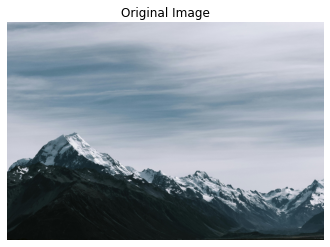

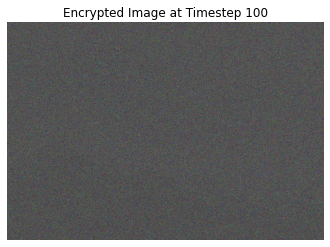

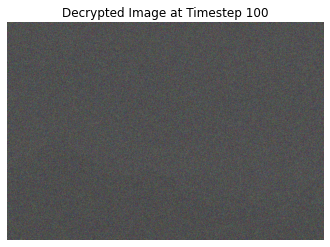

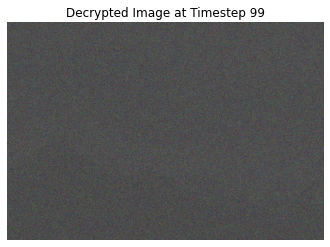

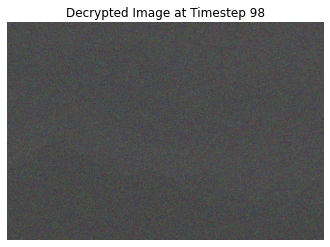

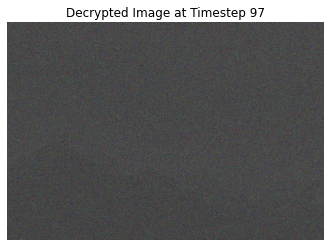

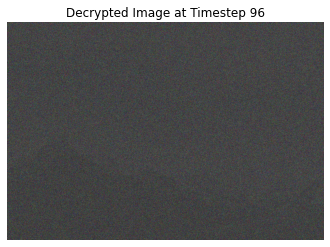

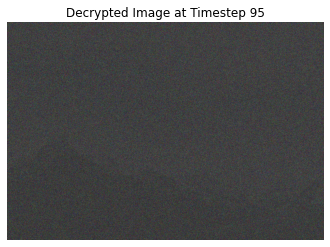

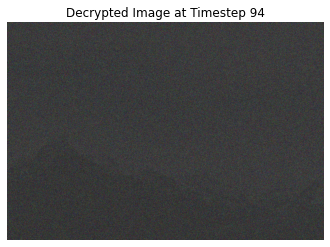

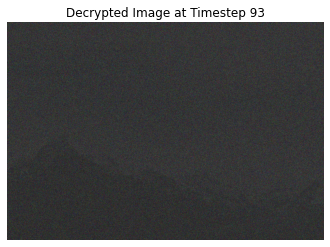

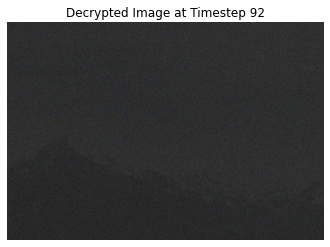

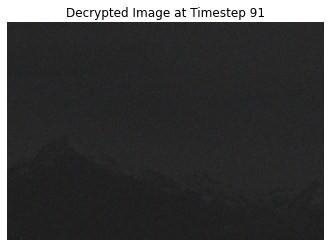

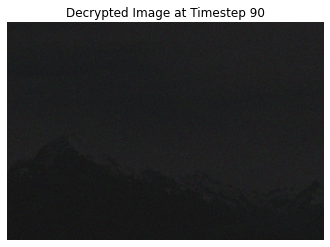

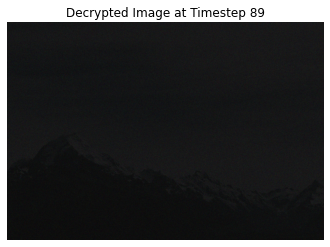

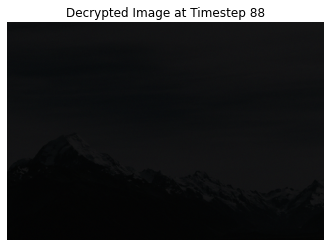

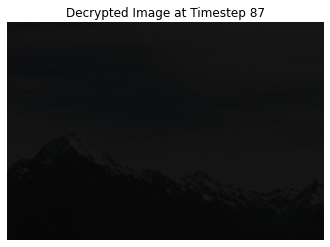

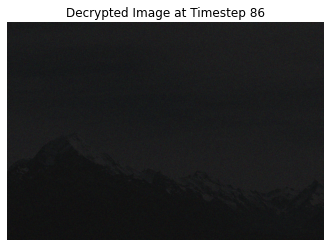

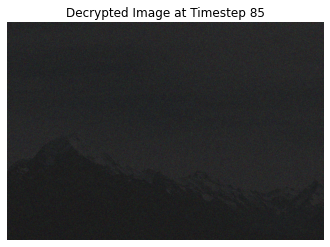

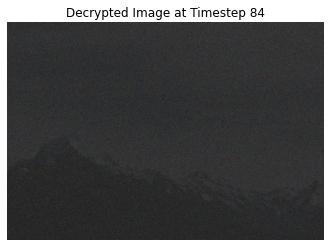

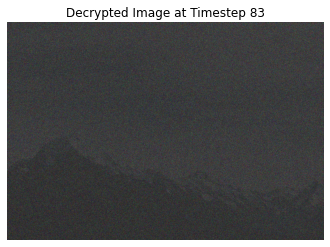

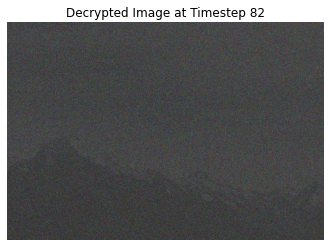

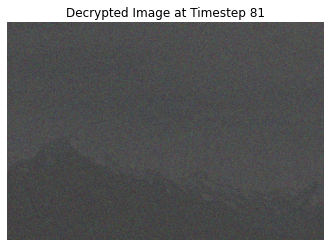

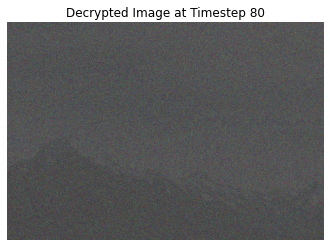

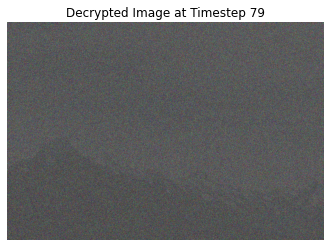

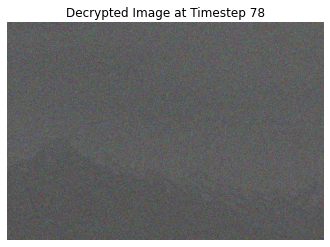

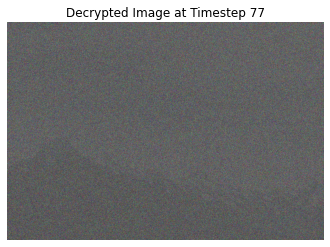

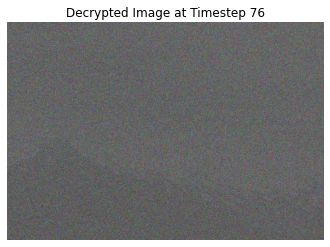

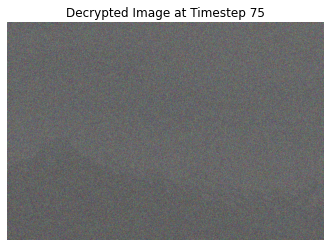

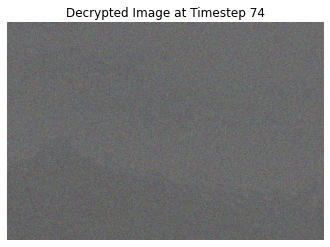

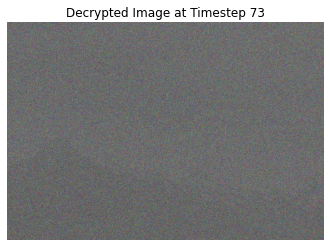

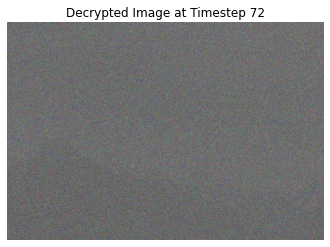

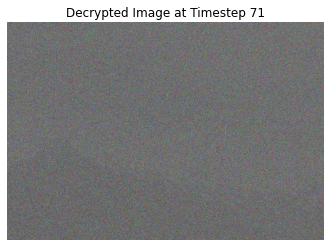

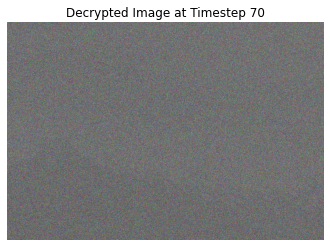

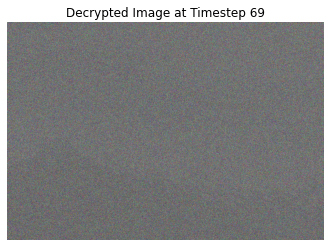

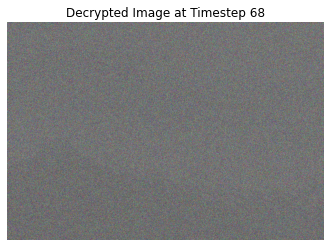

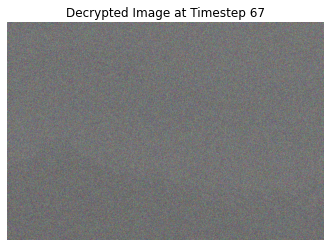

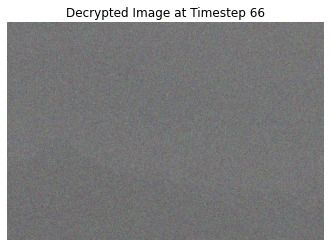

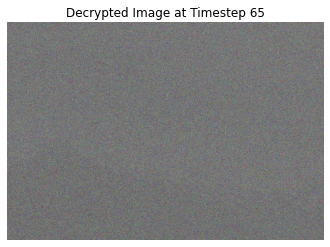

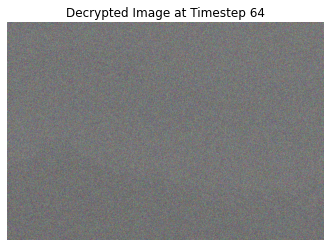

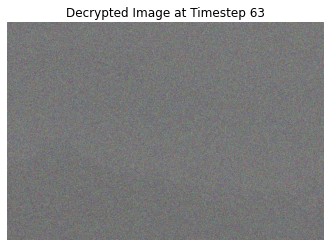

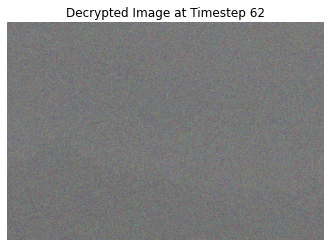

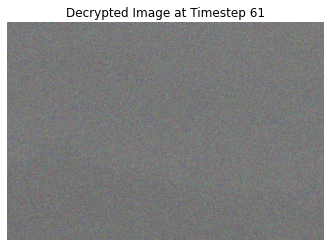

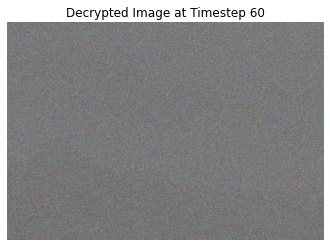

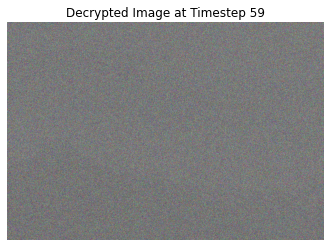

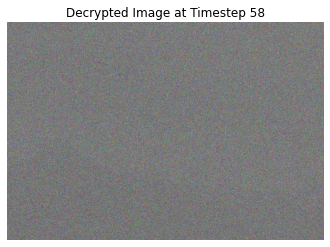

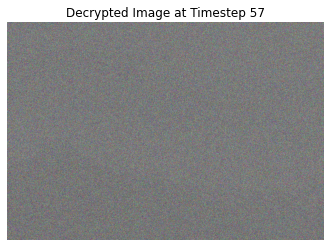

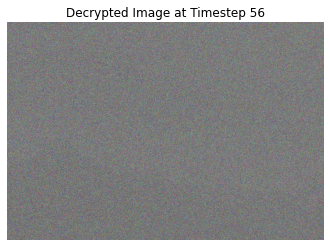

KeyboardInterrupt: 

In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

# Define parameters
beta1 = 0.01  # Example value for beta1
beta2 = 0.99  # Example value for beta2
timesteps = 1000  # Increased number of timesteps

# Construct b_t, a_t, and ab_t
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#b_t = (beta2 - beta1) * torch.linspace(0, 1, timesteps + 1, device=device) + beta1
b_t = torch.full((timesteps + 1,), 0.0001, device=device)
a_t = 1 - b_t
ab_t = torch.cumsum(a_t.log(), dim=0).exp().to(device)  # Move ab_t to the same device
ab_t[0] = 1.0  # Ensure the initial value is 1.0 (100% of the original image)

image_path = 'pexels-lastly-772803.jpg'  # Replace with your image path
img = Image.open(image_path)  
img = img.convert('RGB')  
img_array = np.array(img)
img_array = img_array / 255.0  # Normalize to [0, 1]
img_tensor = torch.tensor(img_array, dtype=torch.float32, device=device).permute(2, 0, 1).unsqueeze(0)  # Convert to tensor and add batch dimension, move to device

plt.imshow(np.clip(img_array, 0, 1))  # Ensure values are in [0, 1]
plt.title(f"Original Image")
plt.axis('off')
plt.show()

noise = torch.randn_like(img_tensor, device=device)
encrypted_image = ab_t.sqrt()[100, None, None, None] * img_tensor + (1 - ab_t[100, None, None, None]).sqrt() * noise

encrypted_image = encrypted_image.squeeze().permute(1, 2, 0).cpu().numpy()  # Convert back to HWC format for visualization

plt.imshow(np.clip(encrypted_image, 0, 1))  # Ensure values are in [0, 1]
plt.title(f"Encrypted Image at Timestep {100}")
plt.axis('off')
plt.savefig('encrypted_image.png')  # Save the image
plt.show()

x_t = torch.tensor(encrypted_image.copy(), dtype=torch.float32, device=device).permute(2, 0, 1).unsqueeze(0)
for t in range(100, -1, -1):
    x_t_minus_1 = (x_t - ((1 - a_t[t])/torch.sqrt(1-ab_t[t])) * noise) / torch.sqrt(a_t[t])
    x_t = x_t_minus_1

    decrypted_image = x_t.squeeze().permute(1, 2, 0).cpu().numpy()
    plt.imshow(np.clip(decrypted_image, 0, 1))  # Ensure values are in [0, 1]
    plt.title(f"Decrypted Image at Timestep {t}")
    plt.axis('off')
    plt.show()
